Licensed under the MIT License.

Copyright (c) 2021-2031. All rights reserved.

# Golden Butterfly Storm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties

## Butterfly Curve
* Butterfly curve formula: https://mathworld.wolfram.com/ButterflyCurve.html
  * The single butterfly is using the parametric equations (rectilinear plot)
  * The storms are using the polar equation (polar plot)
  * `theta` is the angle list
* This was originally published in 1989 with the aim of exciting students to learn math through modifying params in fun curves

### Golden Butterfly

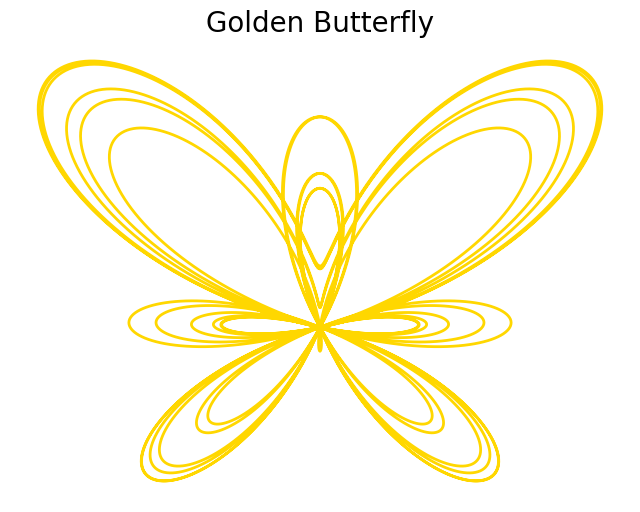

In [2]:
t=np.arange (0.0, 12 * np.pi, 0.01)
x=np.sin(t) * (np.e ** np.cos(t)-2 * np.cos(4 * t) -np.sin(t/12) ** 5)
y=np.cos(t) * (np.e ** np.cos(t)-2 * np.cos(4 * t) -np.sin(t/12) ** 5)

plt.figure (figsize=(8,6))
plt.axis ("off")
plt.title('Golden Butterfly', fontsize=20)
plt.plot(x, y, color="gold", linewidth="2")
plt.show()

### Golden Butterfly Storm

In [3]:
r = np.arange(0, 2, 0.01)

theta = 2 * np.pi * r
print('theta samples:', theta[0:10], len(theta), 'records')
r_of_theta = []
r_of_theta = np.e**np.sin(theta) - 2*np.cos(4*theta) + np.sin((2*theta-np.pi)/24)**5
print('r_of_theta:')
r_of_theta.astype(int)

theta samples: [0.         0.06283185 0.12566371 0.18849556 0.25132741 0.31415927
 0.37699112 0.43982297 0.50265482 0.56548668] 200 records
r_of_theta:


array([-1,  0,  0,  0,  0,  0,  1,  1,  2,  2,  3,  3,  3,  4,  4,  3,  3,
        3,  2,  2,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  2,  2,  3,
        3,  3,  4,  4,  3,  3,  3,  2,  2,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  2,  2,  2,  2,  2,  1,  1,
        0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  1,  1,
        2,  2,  2,  2,  2,  2,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  2,  2,  3,  3,  3,  4,  4,  3,  3,  3,  2,
        2,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,  2,  2,  2,  3,  3,  3,
        4,  4,  4,  3,  3,  3,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  1,  2,  2,  2,  2,  2,  2,  1,  1,  0,  0,
        0,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  1,  1,  0,  0,  0,  0,  0,  0])

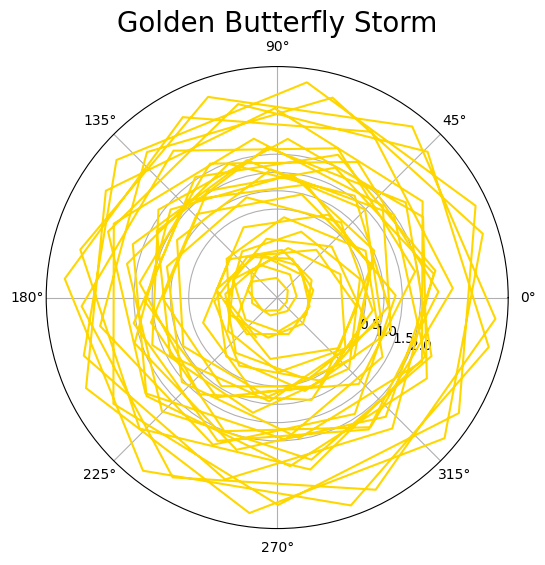

In [4]:
plt.figure(figsize=(8,6))
ax = plt.subplot(projection='polar')
ax.plot(r_of_theta, color='gold')
ax.set_rticks([0.5, 1, 1.5, 2]) 
ax.set_rlabel_position(-22.5)
plt.title('Golden Butterfly Storm', fontsize=20)
plt.show()

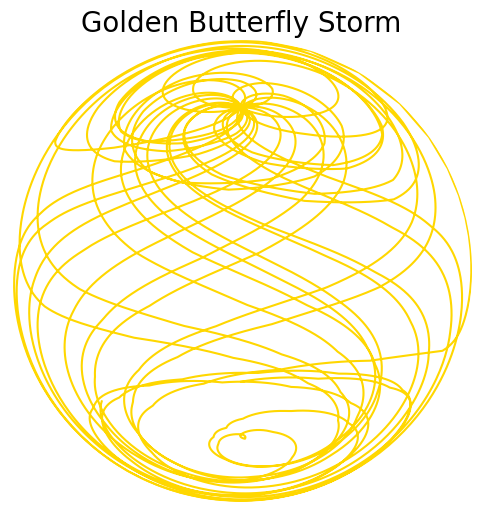

In [5]:
plt.figure (figsize=(8,6))
ax = plt.subplot(projection='lambert')
plt.axis ("off")
ax.plot(r_of_theta,color='gold')
plt.title('Golden Butterfly Storm', fontsize=20)
plt.show()

## Golden Butterfly Dances

* The idea is to generate a list of individual butterfly locations, the link them with curves from the distributions.
* Generated curves should be smooth, pretty with various shapes. Therefore decided to find a distribution that has various curve shapes when params change. The curves can come from either PDF or CDF.

In [7]:
from scipy.stats import beta, logistic

In [16]:
dist_params_dct = {
    'beta':{'params_lst': [[2, 5], [0.5, 0.5], [5,1]], 'cdf': beta.cdf, 'pdf': beta.pdf, 'ppf': beta.ppf},
    'logistic': {'params_lst': [[2, 1], [9, 4], [15, 5]], 'cdf': logistic.cdf, 'pdf': logistic.pdf, 'ppf': logistic.ppf}
}

color_lst = ['green', 'purple', 'orange', 'brown', 'orange']

def draft_plot(dist_type):
    t = np.arange (0.0, 12 * np.pi, 0.01)
    x0 = np.sin(t) * (np.e ** np.cos(t)-2 * np.cos (4 * t) -np.sin(t/12) ** 5)
    y0 = np.cos(t) * (np.e ** np.cos(t)-2 * np.cos (4 * t) -np.sin(t/12) ** 5)
    
    interval = round(max(max(x0)-min(x0), max(y0)-min(y0))) * 2
    print(f'Interval: {interval}')
    
    fig = plt.figure(figsize=(15,5))
    ax1=fig.add_subplot(1,3,1)  # this is used to plot PDF
    ax2=fig.add_subplot(1,3,2)  # this is used to plot CDF
    
    dist_settings = dist_params_dct[dist_type]
    params_lst = dist_settings['params_lst']
    pdf = dist_settings['pdf']
    ppf = dist_settings['ppf']
    cdf = dist_settings['cdf']
    
    for i in range(len(params_lst)):
        args = params_lst[i]

        x = np.linspace(ppf(0.01, *args),
                        ppf(0.99, *args), 100)

        ax1.plot(x, pdf(x, *args), color=color_lst[i], lw=2, alpha=0.7, label=dist_type + f' pdf ({args})')
        ax1.legend(loc='best', frameon=False)

        ax2.plot(x[::interval], cdf(x, *args)[::interval], 'b*', lw=5, alpha=0.7, label=dist_type + f' cdf ({args})')
        ax2.legend(loc='best', frameon=False)

    plt.show()

Interval: 12


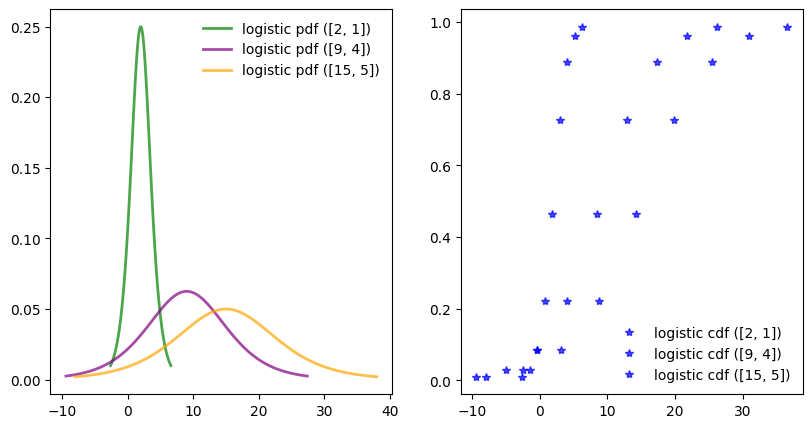

In [17]:
draft_plot(dist_type='logistic')

Interval: 12


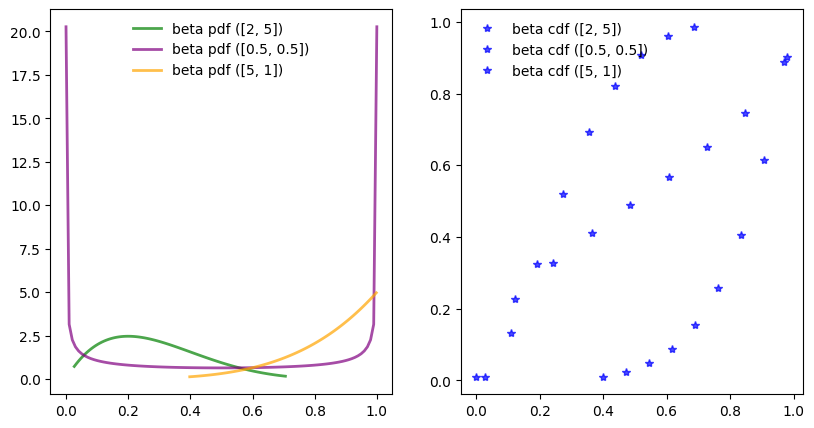

In [18]:
draft_plot(dist_type='beta')

In [19]:
selected_dist_params_dct = {
    'beta':{'params_lst': [[2, 5], [0.5, 0.5], [5,1]], 'ppf': beta.ppf,
            'selected_dist': beta.cdf, 'multiplier_x': 150, 'multiplier_y': 150},
    'logistic': {'params_lst': [[2, 1], [9, 4], [15, 5]], 'ppf': logistic.ppf,
                 'selected_dist': logistic.cdf, 'multiplier_x': 5, 'multiplier_y': 100}
}

def butterfly_dance_plot(dist_type):
    t = np.arange (0.0, 12 * np.pi, 0.01)
    x0 = np.sin(t) * (np.e ** np.cos(t) - 2 * np.cos(4 * t) - np.sin(t/12) ** 5)
    y0 = np.cos(t) * (np.e ** np.cos(t) - 2 * np.cos(4 * t) - np.sin(t/12) ** 5)
     
    interval = round(max(max(x0)-min(x0), max(y0)-min(y0))) * 2

    x0_lst = x0
    y0_lst = y0

    dist_settings = selected_dist_params_dct[dist_type]
    params_lst = dist_settings['params_lst']
    ppf = dist_settings['ppf']
    selected_dist = dist_settings['selected_dist']
    multiplier_x = dist_settings['multiplier_x']
    multiplier_y = dist_settings['multiplier_y']
    
    for i in range(len(params_lst)):
        args = params_lst[i]

        x = np.linspace(ppf(0.01, *args),
                        ppf(0.99, *args), 100)

        x_lst = x[::interval]
        y_lst = selected_dist(x, *args)[::interval]

        for i in range(len(x_lst)):
            x0_lst = np.append(x0_lst, x0 + x_lst[i]*multiplier_x)
            y0_lst = np.append(y0_lst, y0 + y_lst[i]*multiplier_y)
            
    plt.figure(figsize=(16,8))
    plt.axis("off")
    plt.title('Golden Butterfly Dances', fontsize=20)
    plt.plot(x0_lst, y0_lst, color="gold", linewidth="1.2")
    plt.show()

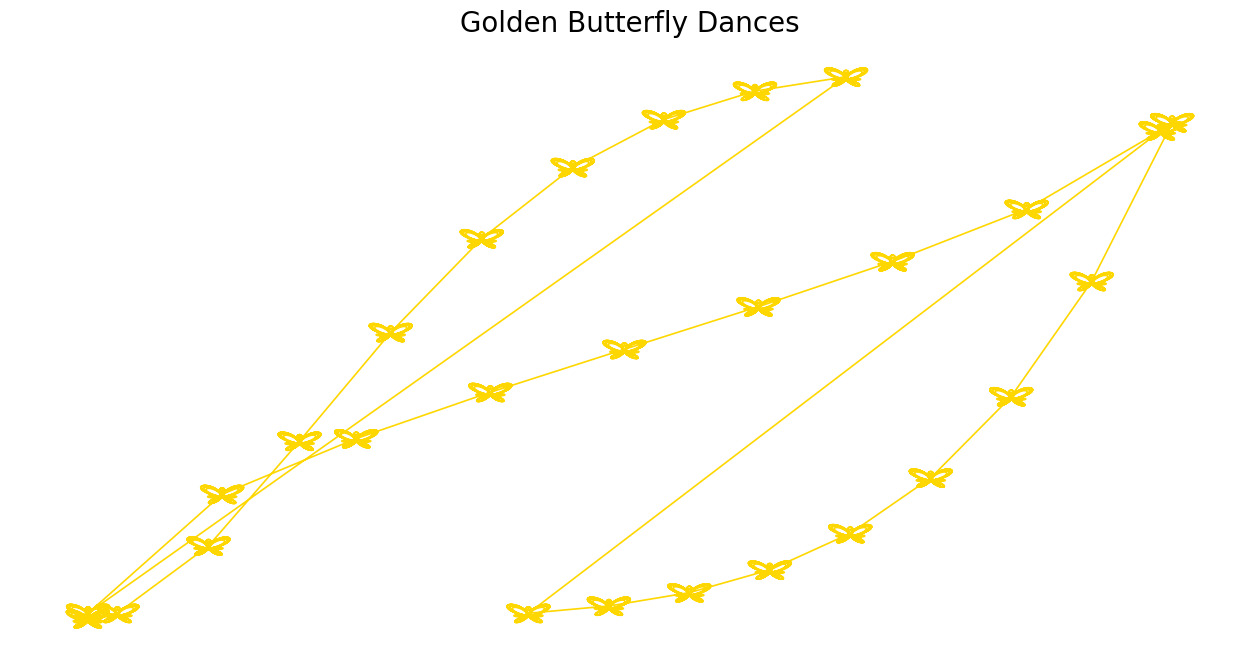

In [20]:
butterfly_dance_plot(dist_type='beta')

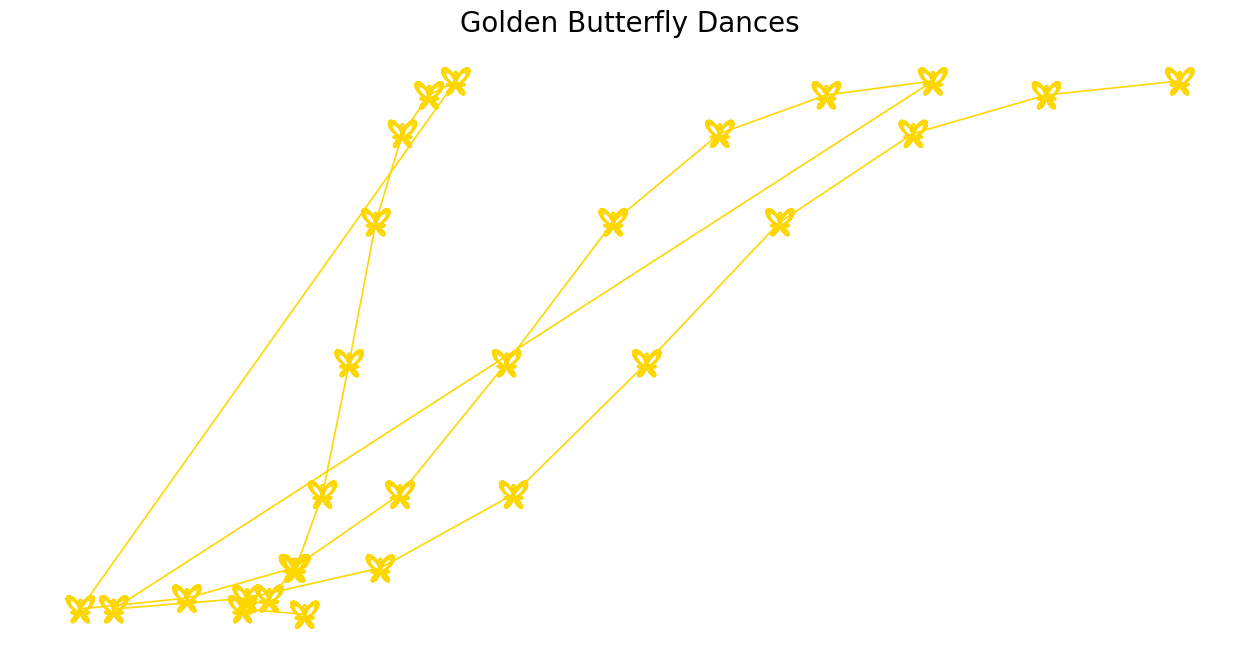

In [49]:
butterfly_dance_plot(dist_type='logistic')

## More About Distributions

#### Beta Distribution
  * It's a type of <b>continuous probability distribution</b> defined by `αlpha` and `beta`
    * x-axis is between [0,1]
  * Its multivariate distribution is "Dirichlet Distribution"
    * PDF (probability density function) indicates the probability that `X` takes a value at `xi`
    * CDF (cumulative distribution function) is the cumulative probability, indicating the probability that `X` takes values `<= xi`
    * PDF is also the derivative of CDF
  * More from Wiki: https://en.wikipedia.org/wiki/Beta_distribution
  * scipy code: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html
  
#### Logistic Distribution
  * Its CDF is the logistic function which used in logistic regression
  * More from Wiki: https://en.wikipedia.org/wiki/Logistic_distribution
  * scipy code: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.logistic.html
  * For this plot, besides logistic distribution, normal distribution, student's t and other distributions with PDFs are bell like shapped should also work, they share similar shapes in PDFs, CDFs
    * Student's t is often used to estimate the mean of a normally-distributed population in situations where the sample size is small and the population's standard deviation is unknown
  
#### Distribution Groups
* After checking a list of distributions, I have also summarized relative distributions into groups for easier learning.
* Bernoulli Distribution, Binomial Distribution, Geometric Distribution, Hypergometric Distribution, Negative Binomial Distribution
    * They are all discrete distributions
    * Geometric Distribution focus on the probability of 1st success during n bernoulli trials
    * Hypergeometric Distribution is the probability of `k` success in `n` draws without repalcement
    * Negative Binomial Distribution is a discrete probability distribution that models the number of successes in a sequence of independent and identically distributed Bernoulli trials before a specified (non-random) number of failures (denoted r) occurs
* Gamma Distribution, Chi-square Distribution
    * These distributions can be used when x has to be positive (which is not guaranteed in normal distribution)
* Expinential Distribution, Poisson Distribution
    * Exponential Distribution is probability distribution of the time between events in a Poisson point process
    * Poisson Distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event
* Exponential Family: https://en.wikipedia.org/wiki/Exponential_family#Table_of_distributions
    * This is a large family where many distributions are included in.
    
#### Other Distributions
* Log-normal Distribution: https://en.wikipedia.org/wiki/Log-normal_distribution
   *  It's a continuous probability distribution of a random variable whose logarithm is normally distributed
* Cauchy Distribution: https://en.wikipedia.org/wiki/Cauchy_distribution
* F Distribution: https://en.wikipedia.org/wiki/F-distribution
* Weibull Distribution: https://en.wikipedia.org/wiki/Weibull_distribution
* Rayleigh Distribution: https://en.wikipedia.org/wiki/Rayleigh_distribution
* Empirical Discrete & Continuous Distribution: https://www.unf.edu/~cwinton/html/cop4300/s09/class.notes/d4-DiscreteDistributions.pdf
  * It's a type of non-parametric distribution, which means you don't need to specify the params of the distribution
  * This method can be used in monte carlo simulation when you are not sure what kind of PDF the distribution can be used, and just need the existing data sample as the input for the simulation
* Pert Distribution: https://en.wikipedia.org/wiki/PERT_distribution
* Triangular Distribution: https://en.wikipedia.org/wiki/Triangular_distribution
* Generalized Beta Distribution: https://en.wikipedia.org/wiki/Generalized_beta_distribution
   
#### What can be Further Improved
* The draft plots look great doesn't mean it's easy to show beautiful plots with the golden butterflys. I was manually tunning the `multiplier_x` and `multiplier_y` for different distribution types. Any idea on how to save the manually tuning work?